In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.neighbors import KNeighborsRegressor
import scipy.stats
from sklearn.preprocessing import StandardScaler
from pycaret.regression import setup, compare_models
from catboost import CatBoostRegressor
from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score
import optuna
from sklearn.metrics import r2_score

sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 82)

# Exploring the data

In [2]:
#importing the .csv file
train0=pd.read_csv('train.csv')
test0=pd.read_csv('test.csv')
sample_submission=pd.read_csv('sample_submission.csv')

In [3]:
#getting the first few rows of the dataset
train0.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
test0.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [5]:
# getting all the features and its types in dataset
train0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train0.shape

(1460, 81)

In [7]:
test0.shape

(1459, 80)

In [8]:
#In test.csv 'SalesPrice' column is not present we have to predict it.
test0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [9]:
train0.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [10]:
sample_submission

Id      SalePrice
0     1461  169277.052498
1     1462  187758.393989
2     1463  183583.683570
3     1464  179317.477511
4     1465  150730.079977
...    ...            ...
1454  2915  167081.220949
1455  2916  164788.778231
1456  2917  219222.423400
1457  2918  184924.279659
1458  2919  187741.866657

[1459 rows x 2 columns]

# Cleaning the data

## Treating missing values

In [11]:
print('% of missing values in each column: ')
for column, percentage in (train0.isnull().sum().sort_values(ascending=False) / train0.shape[0] * 100).items():
    count = math.ceil(percentage)
    if count > 0:
        print(f"{column}  : {count}% --------{np.dtype(train0[column])}")

% of missing values in each column: 
PoolQC  : 100% --------object
MiscFeature  : 97% --------object
Alley  : 94% --------object
Fence  : 81% --------object
FireplaceQu  : 48% --------object
LotFrontage  : 18% --------float64
GarageYrBlt  : 6% --------float64
GarageCond  : 6% --------object
GarageType  : 6% --------object
GarageFinish  : 6% --------object
GarageQual  : 6% --------object
BsmtFinType2  : 3% --------object
BsmtExposure  : 3% --------object
BsmtQual  : 3% --------object
BsmtCond  : 3% --------object
BsmtFinType1  : 3% --------object
MasVnrArea  : 1% --------float64
MasVnrType  : 1% --------object
Electrical  : 1% --------object


In [12]:
print('% of missing values in each column: ')
for column, percentage in (test0.isnull().sum().sort_values(ascending=False) / test0.shape[0] * 100).items():
    count = math.ceil(percentage)
    if count > 0:
        print(f"{column}  : {count}% --------{np.dtype(test0[column])}")

% of missing values in each column: 
PoolQC  : 100% --------object
MiscFeature  : 97% --------object
Alley  : 93% --------object
Fence  : 81% --------object
FireplaceQu  : 51% --------object
LotFrontage  : 16% --------float64
GarageYrBlt  : 6% --------float64
GarageQual  : 6% --------object
GarageFinish  : 6% --------object
GarageCond  : 6% --------object
GarageType  : 6% --------object
BsmtCond  : 4% --------object
BsmtQual  : 4% --------object
BsmtExposure  : 4% --------object
BsmtFinType1  : 3% --------object
BsmtFinType2  : 3% --------object
MasVnrType  : 2% --------object
MasVnrArea  : 2% --------float64
MSZoning  : 1% --------object
BsmtHalfBath  : 1% --------float64
Utilities  : 1% --------object
Functional  : 1% --------object
BsmtFullBath  : 1% --------float64
BsmtFinSF1  : 1% --------float64
BsmtFinSF2  : 1% --------float64
BsmtUnfSF  : 1% --------float64
KitchenQual  : 1% --------object
TotalBsmtSF  : 1% --------float64
Exterior2nd  : 1% --------object
GarageCars  : 1% -----

## Combmining the test & train dataset for filling the missing values better 

In [13]:
target = train0['SalePrice']
test_id = test0['Id']

train1 = train0.drop(['Id', 'SalePrice'], axis = 1)
test1 = test0.drop(['Id'], axis = 1)
 
data1 = pd.concat([train1,test1], axis=0).reset_index(drop = True)

In [14]:
data1

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
2914         160       RM         21.0     1936   Pave   NaN      Reg   
2915         160       RM         21.0     1894   Pave   NaN      Reg   
2916          20       RL        160.0    20000   Pave   NaN      Reg   
2917          85       RL         62.0    10441   Pave   NaN      Reg   
2918          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
2914         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
2915         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
2916         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2917         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2918         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
2914       Norm    Twnhs     2Story            4            7       1970   
2915       Norm   TwnhsE     2Story            4            5       1970   
2916       Norm     1Fam     1Story            5            7       1960   
2917       Norm     1Fam     SFoyer            5            5       1992   
2918       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
2914          1970     Gable  CompShg     CemntBd     CmentBd       None   
2915          1970     Gable  CompShg     CemntBd     CmentBd       None   
2916          1996     Gable  CompShg     VinylSd     VinylSd       None   
2917          1992     Gable  CompShg     HdBoard     Wd Shng       None   
2918          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   


In [15]:
target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

## Cleaning

In [16]:
data1.select_dtypes(np.number)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
2914         160         21.0     1936            4            7       1970   
2915         160         21.0     1894            4            5       1970   
2916          20        160.0    20000            5            7       1960   
2917          85         62.0    10441            5            5       1992   
2918          60         74.0     9627            7            5       1993   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0             2003       196.0       706.0         0.0      150.0   
1             1976         0.0       978.0         0.0      284.0   
2             2002       162.0       486.0         0.0      434.0   
3             1970         0.0       216.0         0.0      540.0   
4             2000       350.0       655.0         0.0      490.0   
...            ...         ...         ...         ...        ...   
2914          1970         0.0         0.0         0.0      546.0   
2915          1970         0.0       252.0         0.0      294.0   
2916          1996         0.0      1224.0         0.0        0.0   
2917          1992         0.0       337.0         0.0      575.0   
2918          1994        94.0       758.0         0.0      238.0   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0           856.0       856       854             0       1710           1.0   
1          1262.0      1262         0             0       1262           0.0   
2           920.0       920       866             0       1786           1.0   
3           756.0       961       756             0       1717           1.0   
4          1145.0      1145      1053             0       2198           1.0   
...           ...       ...       ...           ...        ...           ...   
2914        546.0       546       546             0       1092           0.0   
2915        546.0       546       546             0       1092           0.0   
2916       1224.0      1224         0             0       1224           1.0   
2917        912.0       970         0             0        970           0.0   
2918        996.0       996      1004             0       2000           0.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0              0.0         2         1             3             1   
1              1.0         2         0             3             1   
2              0.0         2         1             3             1   
3              0.0         1         0             3             1   
4              0.0         2         1             4             1   
...            ...       ...       ...           ...           ...   
2914           0.0         1         1             3             1   
2915           0.0         1         1             3             1   
2916           0.0         1         0             4             1   
2917           1.0         1         0             3             1   
2918           0.0         2         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0         2.0       548.0   
1                6           1       1976.0         2.0       460.0   
2                6           1       2001.0         2.0       608.0   
3                7           1       1998.0         3.0       642.0   
4                9           1       2000.0         3.0       836.0   


In [17]:
data2 = data1.copy() 

In [18]:
data2['MSSubClass'] = data2['MSSubClass'].astype(str)

In [19]:
data2['MSSubClass']

0        60
1        20
2        60
3        70
4        60
       ... 
2914    160
2915    160
2916     20
2917     85
2918     60
Name: MSSubClass, Length: 2919, dtype: object

In [20]:
# Categorical features
data2.select_dtypes('object').loc[:, data2.isna().sum() > 0].columns

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

### Some NA holds a meaning so I am going to filter the categorical columns based on it.
* (NA) No alley access - Alley 
* (NA) No Basement - BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
* (NA) No Fireplace - FireplaceQu
* (NA) No Garage - GarageType, GarageFinish, GarageQual, GarageCond
* (NA) No Fence - Fence
* (NA) Use Mode - Electrical, KitchenQual, Functional, SaleType, Utilities, MSZoning, Exterior1st, Exterior2nd
* (delete)Na means none - MasVnrType, PoolQC(all none better to delete), MiscFeature

In [21]:
#filling NA
data2['Alley'] = data2['Alley'].fillna('No alley access')
data2['BsmtQual'] = data2['BsmtQual'].fillna('No Basement')
data2['BsmtCond'] = data2['BsmtCond'].fillna('No Basement')
data2['BsmtExposure'] = data2['BsmtExposure'].fillna('No Basement')
data2['BsmtFinType1'] = data2['BsmtFinType1'].fillna('No Basement')
data2['BsmtFinType2'] = data2['BsmtFinType2'].fillna('No Basement')
data2['FireplaceQu'] = data2['FireplaceQu'].fillna('No Fireplace')
data2['GarageType'] = data2['GarageType'].fillna('No Garage')
data2['GarageFinish'] = data2['GarageFinish'].fillna('No Garage')
data2['GarageQual'] = data2['GarageQual'].fillna('No Garage')
data2['GarageCond'] = data2['GarageCond'].fillna('No Garage')

data2['Fence'] = data2['Fence'].fillna('No Fence')
for column in ['Electrical', 
               'KitchenQual', 
               'Functional', 
               'SaleType', 
               'MSZoning',
               'Utilities', 
               'Exterior1st',
               'Exterior2nd']:
    data2[column] = data2[column].fillna(data2[column].mode()[0])
    
data2=data2.drop(columns = ['MasVnrType','PoolQC','MiscFeature'])

In [22]:
# for Numerical Features using KNN Regressor, could use mean but KNN is more smart way.
data3 = data2.copy()

In [23]:
data3.select_dtypes('number').isna().sum()

LotFrontage      486
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      159
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [24]:
def knn_impute(df, na_target):
    df = df.copy()
    numeric_df = df.select_dtypes('number')
    non_na_col = numeric_df.loc[:, numeric_df.isna().sum() == 0].columns
    
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    x_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_col]
    x_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_col]
    
    knn = KNeighborsRegressor()
    knn.fit(x_train, y_train)
    
    y_pred = knn.predict(x_test)
    df.loc[df[na_target].isna() == True, na_target] = y_pred
    
    return df

In [25]:
# Numeric columns with missing value
data3.columns[data3.isna().sum() > 0]

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [26]:
#filling NA
for column in ['LotFrontage', 
               'MasVnrArea', 
               'BsmtFinSF1', 
               'BsmtFinSF2', 
               'BsmtUnfSF',
               'TotalBsmtSF', 
               'BsmtFullBath', 
               'BsmtHalfBath', 
               'GarageYrBlt',
               'GarageCars', 
               'GarageArea']:
    data3 = knn_impute(data3, column) 

In [27]:
data3.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [28]:
data4 = data3.copy()

# Feature Engineering

In [29]:
# creating new feature based on known features
data4["SqFtPerRoom"] = data4["GrLivArea"] / (data4["TotRmsAbvGrd"] +
                                                       data4["FullBath"] +
                                                       data4["HalfBath"] +
                                                       data4["KitchenAbvGr"])

data4['Total_Home_Quality'] = data4['OverallQual'] + data4['OverallCond']

data4['Total_Bathrooms'] = (data4['FullBath'] + (0.5 * data4['HalfBath']) +
                               data4['BsmtFullBath'] + (0.5 * data4['BsmtHalfBath']))

data4["HighQualSF"] = data4["1stFlrSF"] + data4["2ndFlrSF"]

In [30]:
data4

MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
0            60       RL         65.0     8450   Pave  No alley access   
1            20       RL         80.0     9600   Pave  No alley access   
2            60       RL         68.0    11250   Pave  No alley access   
3            70       RL         60.0     9550   Pave  No alley access   
4            60       RL         84.0    14260   Pave  No alley access   
...         ...      ...          ...      ...    ...              ...   
2914        160       RM         21.0     1936   Pave  No alley access   
2915        160       RM         21.0     1894   Pave  No alley access   
2916         20       RL        160.0    20000   Pave  No alley access   
2917         85       RL         62.0    10441   Pave  No alley access   
2918         60       RL         74.0     9627   Pave  No alley access   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0         Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1         Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2         IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3         IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4         IR1         Lvl    AllPub       FR2       Gtl      NoRidge   
...       ...         ...       ...       ...       ...          ...   
2914      Reg         Lvl    AllPub    Inside       Gtl      MeadowV   
2915      Reg         Lvl    AllPub    Inside       Gtl      MeadowV   
2916      Reg         Lvl    AllPub    Inside       Gtl      Mitchel   
2917      Reg         Lvl    AllPub    Inside       Gtl      Mitchel   
2918      Reg         Lvl    AllPub    Inside       Mod      Mitchel   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0          Norm       Norm     1Fam     2Story            7            5   
1         Feedr       Norm     1Fam     1Story            6            8   
2          Norm       Norm     1Fam     2Story            7            5   
3          Norm       Norm     1Fam     2Story            7            5   
4          Norm       Norm     1Fam     2Story            8            5   
...         ...        ...      ...        ...          ...          ...   
2914       Norm       Norm    Twnhs     2Story            4            7   
2915       Norm       Norm   TwnhsE     2Story            4            5   
2916       Norm       Norm     1Fam     1Story            5            7   
2917       Norm       Norm     1Fam     SFoyer            5            5   
2918       Norm       Norm     1Fam     2Story            7            5   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0          2003          2003     Gable  CompShg     VinylSd     VinylSd   
1          1976          1976     Gable  CompShg     MetalSd     MetalSd   
2          2001          2002     Gable  CompShg     VinylSd     VinylSd   
3          1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4          2000          2000     Gable  CompShg     VinylSd     VinylSd   
...         ...           ...       ...      ...         ...         ...   
2914       1970          1970     Gable  CompShg     CemntBd     CmentBd   
2915       1970          1970     Gable  CompShg     CemntBd     CmentBd   
2916       1960          1996     Gable  CompShg     VinylSd     VinylSd   
2917       1992          1992     Gable  CompShg     HdBoard     Wd Shng   
2918       1993          1994     Gable  CompShg     HdBoard     HdBoard   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   
...        

In [31]:
data5 = data4.copy()

# Outlier Treatment

In [32]:
data5.describe()

LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  \
count  2919.000000    2919.000000  2919.000000  2919.000000  2919.000000   
mean     70.154916   10168.114080     6.089072     5.564577  1971.312778   
std      22.697641    7886.996359     1.409947     1.113131    30.291442   
min      21.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      60.000000    7478.000000     5.000000     5.000000  1953.500000   
50%      70.000000    9453.000000     6.000000     5.000000  1973.000000   
75%      80.100000   11570.000000     7.000000     6.000000  2001.000000   
max     313.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count   2919.000000  2919.000000  2919.000000  2919.000000  2919.000000   
mean    1984.264474   102.189654   441.332580    49.576841   560.797670   
std       20.894344   178.934095   455.559081   169.176867   439.470508   
min     1950.000000     0.000000     0.000000     0.000000     0.000000   
25%     1965.000000     0.000000     0.000000     0.000000   220.000000   
50%     1993.000000     0.000000   368.000000     0.000000   467.000000   
75%     2004.000000   164.000000   733.000000     0.000000   805.000000   
max     2010.000000  1600.000000  5644.000000  1526.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  2919.000000  2919.000000  2919.000000   2919.000000  2919.000000   
mean   1051.679822  1159.581706   336.483727      4.694416  1500.759849   
std     440.722380   392.362079   428.701456     46.396825   506.051045   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     793.000000   876.000000     0.000000      0.000000  1126.000000   
50%     989.000000  1082.000000     0.000000      0.000000  1444.000000   
75%    1302.000000  1387.500000   704.000000      0.000000  1743.500000   
max    6110.000000  5095.000000  2065.000000   1064.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   2919.000000   2919.000000  2919.000000  2919.000000   2919.000000   
mean       0.429805      0.061322     1.568003     0.380267      2.860226   
std        0.524573      0.245608     0.552969     0.502872      0.822693   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     4.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars  \
count   2919.000000   2919.000000  2919.000000  2919.000000  2919.000000   
mean       1.044536      6.451524     0.597122  1977.632203     1.766701   
std        0.214462      1.569379     0.646129    25.260041     0.761506   
min        0.000000      2.000000     0.000000  1895.000000     0.000000   
25%        1.000000      5.000000     0.000000  1960.000000     1.000000   
50%        1.000000      6.000000     1.000000  1978.000000     2.000000   
75%        1.000000      7.000000     1.000000  2001.000000     2.000000   
max        3.000000     15.000000     4.000000  2207.000000     5.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  2919.000000  2919.000000  2919.000000    2919.000000  2919.000000   
mean    472.897568    93.709832    47.486811      23.098321     2.602261   
std     215.361488   126.526589    67.575493      64.244246    25.188169   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     320.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    26.000000       0.000000     0.000000   
75%     576.000000   168.000000    70.000000       0.000000

In [33]:
def detect_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers

# Detect outliers for each column
outliers_dict = {}

for column in data5.select_dtypes('number'):
    outliers_dict[column] = detect_outliers_iqr(data5[column])

# Display the count of outliers for each column
for column, outliers in outliers_dict.items():
    print(f"Number of outliers in column '{column}': {outliers.sum()}")


Number of outliers in column 'LotFrontage': 222
Number of outliers in column 'LotArea': 128
Number of outliers in column 'OverallQual': 4
Number of outliers in column 'OverallCond': 252
Number of outliers in column 'YearBuilt': 9
Number of outliers in column 'YearRemodAdd': 0
Number of outliers in column 'MasVnrArea': 201
Number of outliers in column 'BsmtFinSF1': 15
Number of outliers in column 'BsmtFinSF2': 348
Number of outliers in column 'BsmtUnfSF': 53
Number of outliers in column 'TotalBsmtSF': 122
Number of outliers in column '1stFlrSF': 42
Number of outliers in column '2ndFlrSF': 8
Number of outliers in column 'LowQualFinSF': 40
Number of outliers in column 'GrLivArea': 74
Number of outliers in column 'BsmtFullBath': 2
Number of outliers in column 'BsmtHalfBath': 175
Number of outliers in column 'FullBath': 4
Number of outliers in column 'HalfBath': 0
Number of outliers in column 'BedroomAbvGr': 78
Number of outliers in column 'KitchenAbvGr': 134
Number of outliers in column 'T

In [34]:
#capping the outliers using Percentile Capping (Winsorizing)
for column in data5.select_dtypes('number'):
    upper_limit = data5[column].quantile(0.95)
    data5[column] = np.where(data5[column] > upper_limit, upper_limit, data5[column])

In [35]:
data5.describe()

LotFrontage       LotArea  OverallQual  OverallCond    YearBuilt  \
count  2919.000000   2919.000000  2919.000000  2919.000000  2919.000000   
mean     69.172593   9550.054950     6.031175     5.550531  1971.275779   
std      19.557365   3554.030862     1.297723     1.075348    30.246786   
min      21.000000   1300.000000     1.000000     1.000000  1872.000000   
25%      60.000000   7478.000000     5.000000     5.000000  1953.500000   
50%      70.000000   9453.000000     6.000000     5.000000  1973.000000   
75%      80.100000  11570.000000     7.000000     6.000000  2001.000000   
max     107.000000  17142.900000     8.000000     8.000000  2007.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count   2919.000000  2919.000000  2919.000000  2919.000000  2919.000000   
mean    1984.200069    91.989791   427.619322    36.212676   551.135320   
std       20.821273   141.928889   412.658161   109.709511   414.962946   
min     1950.000000     0.000000     0.000000     0.000000     0.000000   
25%     1965.000000     0.000000     0.000000     0.000000   220.000000   
50%     1993.000000     0.000000   368.000000     0.000000   467.000000   
75%     2004.000000   164.000000   733.000000     0.000000   805.000000   
max     2007.000000   466.200000  1274.000000   435.000000  1474.600000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  2919.000000  2919.000000  2919.000000        2919.0  2919.000000   
mean   1036.161014  1143.840904   327.004522           0.0  1483.006578   
std     392.093386   343.492834   406.478506           0.0   451.417061   
min       0.000000   334.000000     0.000000           0.0   334.000000   
25%     793.000000   876.000000     0.000000           0.0  1126.000000   
50%     989.000000  1082.000000     0.000000           0.0  1444.000000   
75%    1302.000000  1387.500000   704.000000           0.0  1743.500000   
max    1776.100000  1830.100000  1131.200000           0.0  2464.200000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   2919.000000   2919.000000  2919.000000  2919.000000   2919.000000   
mean       0.415416      0.059952     1.543337     0.371703      2.828023   
std        0.492739      0.237439     0.506391     0.483342      0.742721   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        1.000000      1.000000     2.000000     1.000000      4.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars  \
count   2919.000000   2919.000000  2919.000000  2919.000000  2919.000000   
mean       0.998972      6.380610     0.592669  1977.517780     1.760534   
std        0.032048      1.396184     0.632315    24.850543     0.746849   
min        0.000000      2.000000     0.000000  1895.000000     0.000000   
25%        1.000000      5.000000     0.000000  1960.000000     1.000000   
50%        1.000000      6.000000     1.000000  1978.000000     2.000000   
75%        1.000000      7.000000     1.000000  2001.000000     2.000000   
max        1.000000      9.000000     2.000000  2007.000000     3.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
count  2919.000000  2919.000000  2919.000000    2919.000000     2919.0   
mean    467.746009    87.796848    43.907023      19.760877        0.0   
std     202.670063   107.839895    54.562033      49.827114        0.0   
min       0.000000     0.000000     0.000000       0.000000        0.0   
25%     320.000000     0.000000     0.000000       0.000000        0.0   
50%     480.000000     0.000000    26.000000       0.000000        0.0   
75%     576.000000   168.000000    70.000000       0.000000        0.0   
max     

In [36]:
data5.shape

(2919, 80)

# Visualization

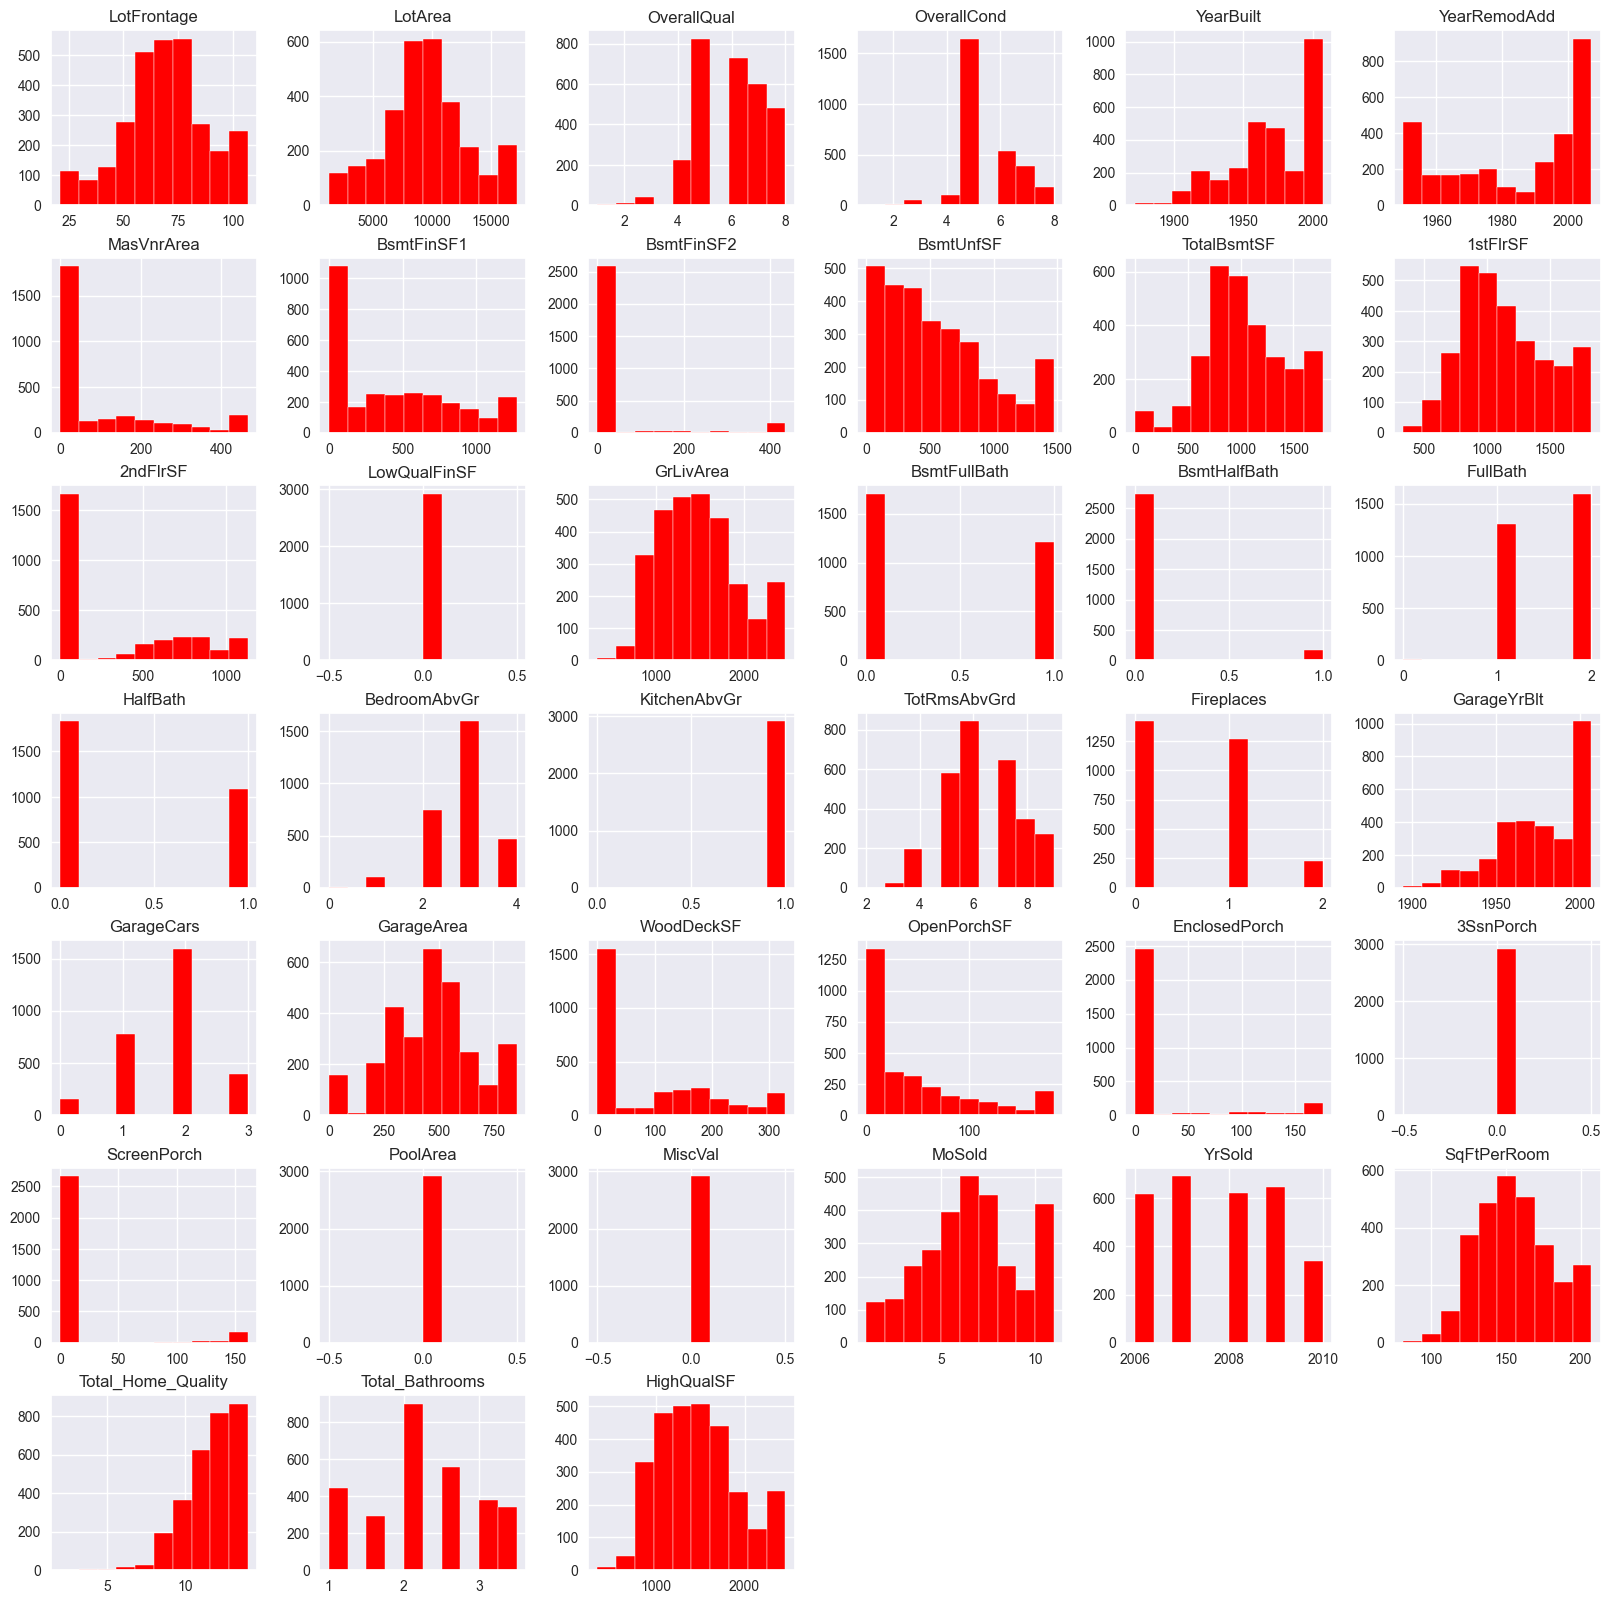

In [37]:
data5.hist(figsize=(20, 20), xlabelsize=10, ylabelsize=10,color='red');

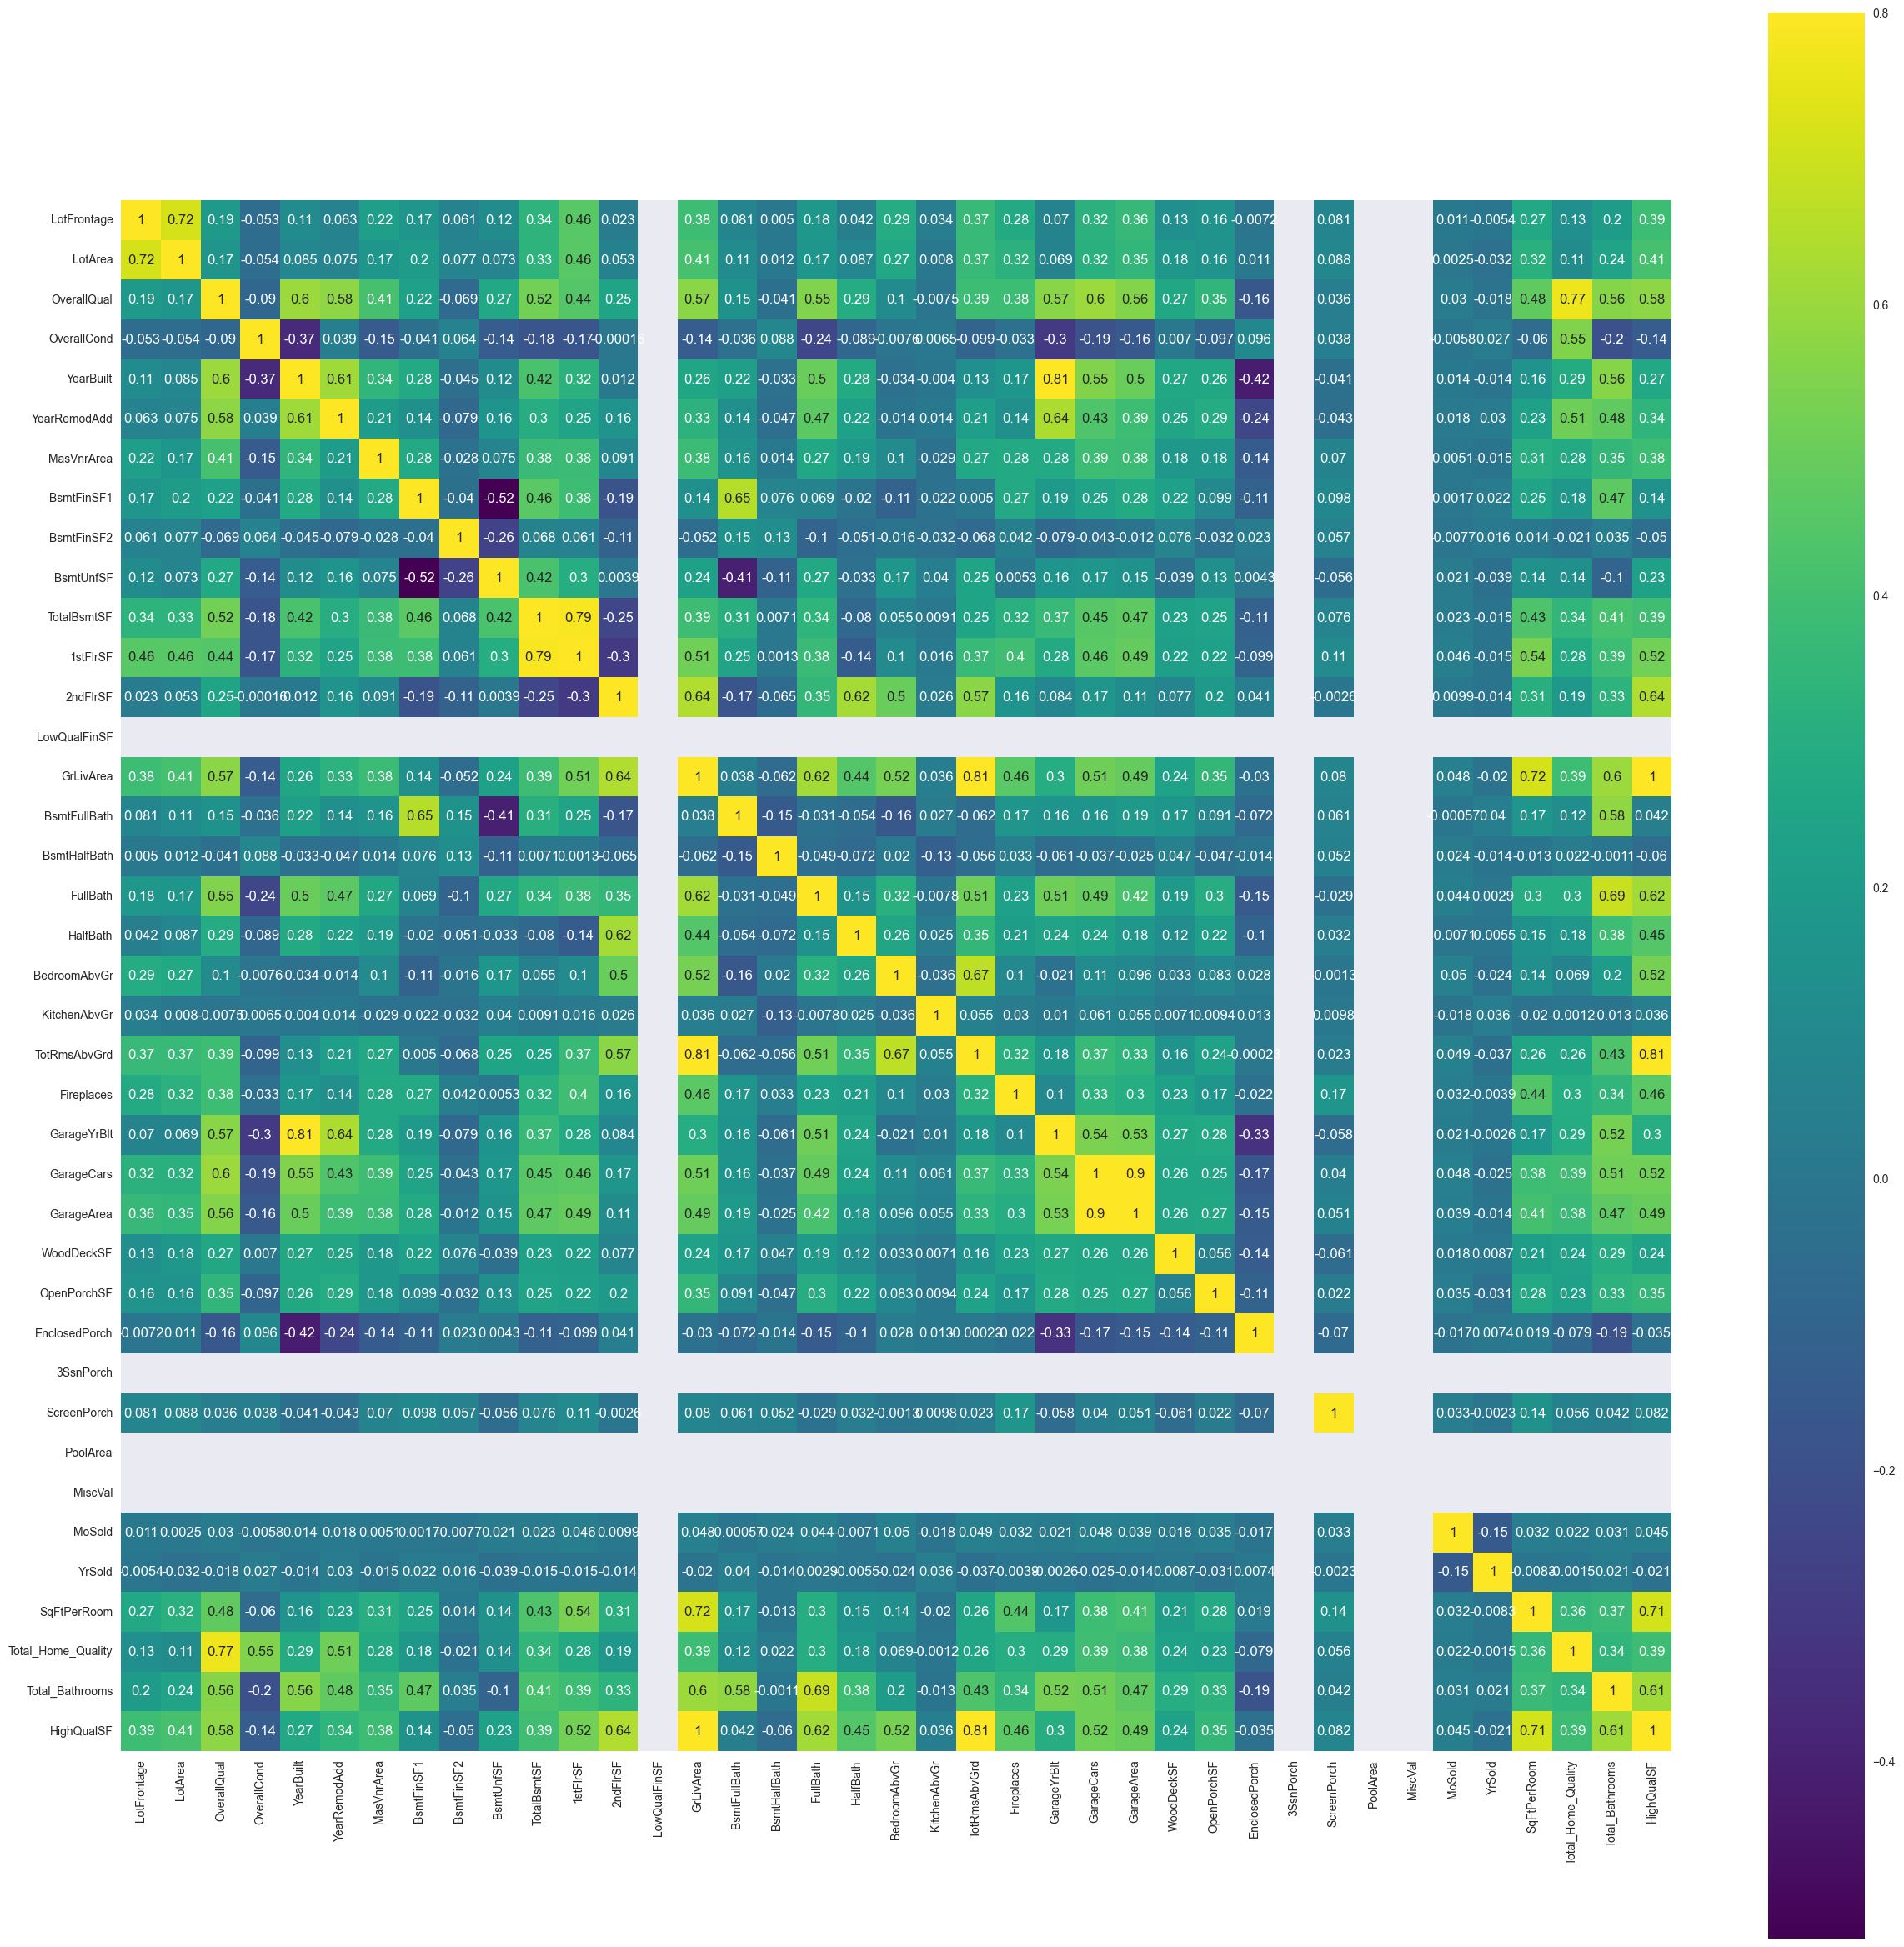

In [38]:
plt.figure(figsize=(30,30))
sns.heatmap(data5.select_dtypes('number').corr(),vmax=.8, annot=True,square=True,cmap='viridis');

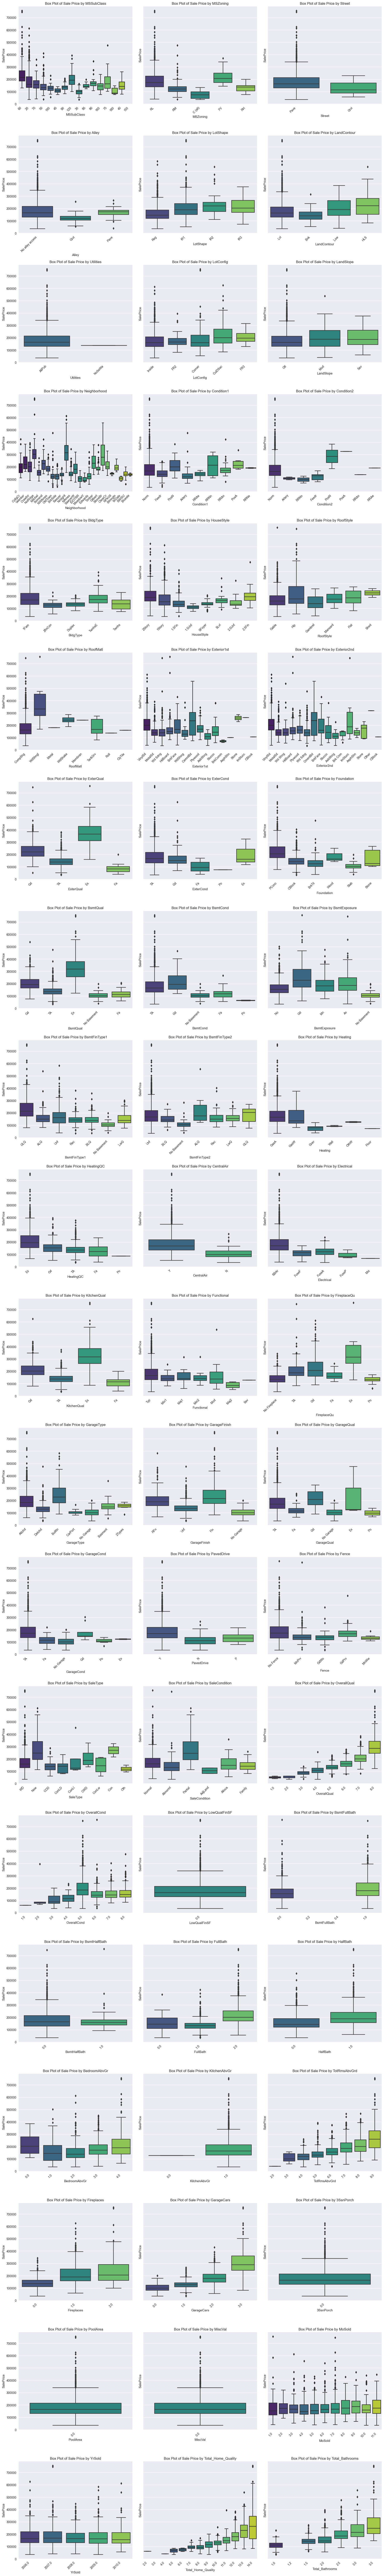

In [39]:
def box_plot(x, ax):
    sns.boxplot(x=x, y=target, data=data5, ax=ax, palette='viridis')
    ax.set_xlabel(x)
    ax.set_ylabel('SalePrice')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'Box Plot of Sale Price by {x}')

# Select categorical and numeric columns
categorical_columns = data5.select_dtypes(exclude='number').columns.tolist()
numeric_columns = data5.select_dtypes('number').columns.tolist()

# Filter numeric columns with <= 16 unique values
for c in numeric_columns:
    if data5[c].nunique() <= 16:
        categorical_columns.append(c)

# Set the number of columns in each row
num_columns = 3

# Calculate the number of rows needed
num_rows = (len(categorical_columns) + num_columns - 1) // num_columns

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, 6 * num_rows), sharey=True)
axes = axes.flatten()

# Plot boxplots for each categorical column against SalePrice
for i, column in enumerate(categorical_columns):
    if i >= len(axes):
        break
    box_plot(column, axes[i])

# Remove empty subplots if any
for i in range(len(categorical_columns), num_rows * num_columns):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Feature Transformation

In [40]:
# Log transform for skewed feature
skew_df = pd.DataFrame(data5.select_dtypes('number').columns, columns = ['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data5[feature]))
skew_df['Absolute'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute'].apply(lambda x : True if x >= 0.5 else False)

In [41]:
# Following feature have skewed distribution so I am going to apply Log Normal Transformation to normalize the distribution.
skew_df

Feature       Skew   Absolute  Skewed
0          LotFrontage  -0.177190   0.177190   False
1              LotArea   0.121471   0.121471   False
2          OverallQual  -0.166980   0.166980   False
3          OverallCond   0.376794   0.376794   False
4            YearBuilt  -0.604144   0.604144    True
5         YearRemodAdd  -0.458466   0.458466   False
6           MasVnrArea   1.438933   1.438933    True
7           BsmtFinSF1   0.552408   0.552408    True
8           BsmtFinSF2   2.995327   2.995327    True
9            BsmtUnfSF   0.681027   0.681027    True
10         TotalBsmtSF  -0.057280   0.057280   False
11            1stFlrSF   0.395660   0.395660   False
12            2ndFlrSF   0.666835   0.666835    True
13        LowQualFinSF        NaN        NaN   False
14           GrLivArea   0.461204   0.461204   False
15        BsmtFullBath   0.343489   0.343489   False
16        BsmtHalfBath   3.707260   3.707260    True
17            FullBath  -0.268958   0.268958   False
18            HalfBath   0.530967   0.530967    True
19        BedroomAbvGr  -0.390417   0.390417   False
20        KitchenAbvGr -31.144840  31.144840    True
21        TotRmsAbvGrd   0.160846   0.160846   False
22          Fireplaces   0.588348   0.588348    True
23         GarageYrBlt  -0.627052   0.627052    True
24          GarageCars  -0.355154   0.355154   False
25          GarageArea  -0.151912   0.151912   False
26          WoodDeckSF   0.846377   0.846377    True
27         OpenPorchSF   1.214885   1.214885    True
28       EnclosedPorch   2.370024   2.370024    True
29           3SsnPorch        NaN        NaN   False
30         ScreenPorch   3.040916   3.040916    True
31            PoolArea        NaN        NaN   False
32             MiscVal        NaN        NaN   False
33              MoSold   0.090255   0.090255   False
34              YrSold   0.132399   0.132399   False
35         SqFtPerRoom   0.231585   0.231585   False
36  Total_Home_Quality  -0.963777   0.963777    True
37     Total_Bathrooms   0.071119   0.071119   False
38          HighQualSF   0.462164   0.462164   False

In [42]:
skew_df.query('Skewed == True')['Feature']

4              YearBuilt
6             MasVnrArea
7             BsmtFinSF1
8             BsmtFinSF2
9              BsmtUnfSF
12              2ndFlrSF
16          BsmtHalfBath
18              HalfBath
20          KitchenAbvGr
22            Fireplaces
23           GarageYrBlt
26            WoodDeckSF
27           OpenPorchSF
28         EnclosedPorch
30           ScreenPorch
36    Total_Home_Quality
Name: Feature, dtype: object

In [43]:
# The are features having min = 0 and log normal is undefined at 0 so overcome it we will add 1.
data5[skew_df.query('Skewed == True')['Feature'].values].describe()

YearBuilt   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count  2919.000000  2919.000000  2919.000000  2919.000000  2919.000000   
mean   1971.275779    91.989791   427.619322    36.212676   551.135320   
std      30.246786   141.928889   412.658161   109.709511   414.962946   
min    1872.000000     0.000000     0.000000     0.000000     0.000000   
25%    1953.500000     0.000000     0.000000     0.000000   220.000000   
50%    1973.000000     0.000000   368.000000     0.000000   467.000000   
75%    2001.000000   164.000000   733.000000     0.000000   805.000000   
max    2007.000000   466.200000  1274.000000   435.000000  1474.600000   

          2ndFlrSF  BsmtHalfBath     HalfBath  KitchenAbvGr   Fireplaces  \
count  2919.000000   2919.000000  2919.000000   2919.000000  2919.000000   
mean    327.004522      0.059952     0.371703      0.998972     0.592669   
std     406.478506      0.237439     0.483342      0.032048     0.632315   
min       0.000000      0.000000     0.000000      0.000000     0.000000   
25%       0.000000      0.000000     0.000000      1.000000     0.000000   
50%       0.000000      0.000000     0.000000      1.000000     1.000000   
75%     704.000000      0.000000     1.000000      1.000000     1.000000   
max    1131.200000      1.000000     1.000000      1.000000     2.000000   

       GarageYrBlt   WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  \
count  2919.000000  2919.000000  2919.000000    2919.000000  2919.000000   
mean   1977.517780    87.796848    43.907023      19.760877    12.795820   
std      24.850543   107.839895    54.562033      49.827114    41.915539   
min    1895.000000     0.000000     0.000000       0.000000     0.000000   
25%    1960.000000     0.000000     0.000000       0.000000     0.000000   
50%    1978.000000     0.000000    26.000000       0.000000     0.000000   
75%    2001.000000   168.000000    70.000000       0.000000     0.000000   
max    2007.000000   328.000000   183.100000     176.000000   161.000000   

       Total_Home_Quality  
count         2919.000000  
mean            11.607742  
std              1.620197  
min              2.000000  
25%             11.000000  
50%             12.000000  
75%             13.000000  
max             14.000000

In [44]:
for column in skew_df.query('Skewed == True')['Feature'].values:
    data5[column] = np.log1p(data5[column])

In [45]:
data5[skew_df.query('Skewed == True')['Feature'].values].describe()

YearBuilt   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count  2919.000000  2919.000000  2919.000000  2919.000000  2919.000000   
mean      7.586825     2.093696     4.218181     0.660593     5.621496   
std       0.015411     2.596104     2.971896     1.812229     1.860886   
min       7.535297     0.000000     0.000000     0.000000     0.000000   
25%       7.577890     0.000000     0.000000     0.000000     5.398163   
50%       7.587817     0.000000     5.910797     0.000000     6.148468   
75%       7.601902     5.105945     6.598509     0.000000     6.692083   
max       7.604894     6.146757     7.150701     6.077642     7.296820   

          2ndFlrSF  BsmtHalfBath     HalfBath  KitchenAbvGr   Fireplaces  \
count  2919.000000   2919.000000  2919.000000   2919.000000  2919.000000   
mean      2.822251      0.041556     0.257645      0.692435     0.388040   
std       3.267311      0.164580     0.335027      0.022214     0.392043   
min       0.000000      0.000000     0.000000      0.000000     0.000000   
25%       0.000000      0.000000     0.000000      0.693147     0.000000   
50%       0.000000      0.000000     0.000000      0.693147     0.693147   
75%       6.558198      0.000000     0.693147      0.693147     0.693147   
max       7.031918      0.693147     0.693147      0.693147     1.098612   

       GarageYrBlt   WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  \
count  2919.000000  2919.000000  2919.000000    2919.000000  2919.000000   
mean      7.590024     2.435851     2.318493       0.743267     0.435954   
std       0.012612     2.573136     2.132912       1.734136     1.407697   
min       7.547502     0.000000     0.000000       0.000000     0.000000   
25%       7.581210     0.000000     0.000000       0.000000     0.000000   
50%       7.590347     0.000000     3.295837       0.000000     0.000000   
75%       7.601902     5.129899     4.262680       0.000000     0.000000   
max       7.604894     5.796058     5.215479       5.176150     5.087596   

       Total_Home_Quality  
count         2919.000000  
mean             2.524805  
std              0.144084  
min              1.098612  
25%              2.484907  
50%              2.564949  
75%              2.639057  
max              2.708050

In [46]:
skew_df = pd.DataFrame(data5.select_dtypes('number').columns, columns = ['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data5[feature]))
skew_df['Absolute'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute'].apply(lambda x : True if x >= 0.5 else False)
skew_df

Feature       Skew   Absolute  Skewed
0          LotFrontage  -0.177190   0.177190   False
1              LotArea   0.121471   0.121471   False
2          OverallQual  -0.166980   0.166980   False
3          OverallCond   0.376794   0.376794   False
4            YearBuilt  -0.630470   0.630470    True
5         YearRemodAdd  -0.458466   0.458466   False
6           MasVnrArea   0.494153   0.494153   False
7           BsmtFinSF1  -0.624577   0.624577    True
8           BsmtFinSF2   2.421467   2.421467    True
9            BsmtUnfSF  -2.177913   2.177913    True
10         TotalBsmtSF  -0.057280   0.057280   False
11            1stFlrSF   0.395660   0.395660   False
12            2ndFlrSF   0.302682   0.302682   False
13        LowQualFinSF        NaN        NaN   False
14           GrLivArea   0.461204   0.461204   False
15        BsmtFullBath   0.343489   0.343489   False
16        BsmtHalfBath   3.707260   3.707260    True
17            FullBath  -0.268958   0.268958   False
18            HalfBath   0.530967   0.530967    True
19        BedroomAbvGr  -0.390417   0.390417   False
20        KitchenAbvGr -31.144840  31.144840    True
21        TotRmsAbvGrd   0.160846   0.160846   False
22          Fireplaces   0.204337   0.204337   False
23         GarageYrBlt  -0.650207   0.650207    True
24          GarageCars  -0.355154   0.355154   False
25          GarageArea  -0.151912   0.151912   False
26          WoodDeckSF   0.146367   0.146367   False
27         OpenPorchSF  -0.067221   0.067221   False
28       EnclosedPorch   1.938643   1.938643    True
29           3SsnPorch        NaN        NaN   False
30         ScreenPorch   2.924905   2.924905    True
31            PoolArea        NaN        NaN   False
32             MiscVal        NaN        NaN   False
33              MoSold   0.090255   0.090255   False
34              YrSold   0.132399   0.132399   False
35         SqFtPerRoom   0.231585   0.231585   False
36  Total_Home_Quality  -2.035899   2.035899    True
37     Total_Bathrooms   0.071119   0.071119   False
38          HighQualSF   0.462164   0.462164   False

In [47]:
# Cosine Transform for Cyclic Feature
''' Here the MoSold contains the month data were 1 & 12 (both are closely related) means Cold weather 
& 6 means Hot weather the model can not classify this information. So we are going to use 
-cosine() to map the month were low value of feature would mean cold and high value of the feature would mean hot. '''
data5['MoSold'].unique()

array([ 2.,  5.,  9., 11., 10.,  8.,  4.,  1.,  7.,  3.,  6.])

In [48]:
data5['MoSold'] = (-np.cos(0.5236 * data5['MoSold']))
data5['MoSold']

0      -0.499998
1       0.866028
2      -0.000011
3      -0.499998
4      -0.866032
          ...   
2914    1.000000
2915    0.500004
2916   -0.000011
2917    0.866021
2918   -0.866032
Name: MoSold, Length: 2919, dtype: float64

In [49]:
data6 = data5.copy()

# Encode Categorical

In [50]:
data6 = pd.get_dummies(data6, dtype=int)

In [51]:
data7 = data6.copy()

# Scaling

In [52]:
scaler = StandardScaler()
scaler.fit(data7)

data7 = pd.DataFrame(scaler.transform(data7), index = data7.index, columns = data7.columns)

In [53]:
data7

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0       -0.213388 -0.309576     0.746685    -0.512044   1.043319   
1        0.553718  0.014055    -0.024027     2.278229   0.162953   
2       -0.059967  0.478397     0.746685    -0.512044   0.978515   
3       -0.469090 -0.000015     0.746685    -0.512044  -1.871119   
4        0.758279  1.325467     1.517398    -0.512044   0.946088   
...           ...       ...          ...          ...        ...   
2914    -2.463565 -2.142739    -1.565452     1.348138  -0.034317   
2915    -2.463565 -2.154558    -1.565452    -0.512044  -0.034317   
2916     1.934508  2.136770    -0.794739     1.348138  -0.364437   
2917    -0.366809  0.250729    -0.794739    -0.512044   0.686092   
2918     0.246875  0.021654     0.746685    -0.512044   0.718648   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         0.903074    1.228785    0.788470   -0.364582  -0.324748   
1        -0.393899   -0.806614    0.898015   -0.364582   0.016658   
2         0.855038    1.155796    0.663018   -0.364582   0.243931   
3        -0.682115   -0.806614    0.390968   -0.364582   0.361139   
4         0.758966    1.451303    0.763273   -0.364582   0.309018   
...            ...         ...         ...         ...        ...   
2914     -0.682115   -0.806614   -1.419600   -0.364582   0.367067   
2915     -0.682115   -0.806614    0.442625   -0.364582   0.035193   
2916      0.566822   -0.806614    0.973456   -0.364582  -3.021388   
2917      0.374678   -0.806614    0.540106   -0.364582   0.394832   
2918      0.470750    0.947805    0.812355   -0.364582  -0.077951   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0       -0.459564 -0.838126  1.202678           0.0   0.502933       1.18660   
1        0.576081  0.344052 -0.863932           0.0  -0.489668      -0.84322   
2       -0.296309 -0.651773  1.206945           0.0   0.671320       1.18660   
3       -0.714649 -0.532390  1.165412           0.0   0.518442       1.18660   
4        0.277632  0.003375  1.266731           0.0   1.584158       1.18660   
...           ...       ...       ...           ...        ...           ...   
2914    -1.250327 -1.740774  1.065951           0.0  -0.866324      -0.84322   
2915    -1.250327 -1.740774  1.065951           0.0  -0.866324      -0.84322   
2916     0.479149  0.233405 -0.863932           0.0  -0.573862       1.18660   
2917    -0.316716 -0.506184 -0.863932           0.0  -1.136631      -0.84322   
2918    -0.102445 -0.430478  1.252159           0.0   1.145464      -0.84322   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0        -0.252538  0.901954  1.300124      0.231589      0.032075   
1         3.959798  0.901954 -0.769157      0.231589      0.032075   
2        -0.252538  0.901954  1.300124      0.231589      0.032075   
3        -0.252538 -1.073143 -0.769157      0.231589      0.032075   
4        -0.252538  0.901954  1.300124      1.578221      0.032075   
...            ...       ...       ...           ...           ...   
2914     -0.252538 -1.073143  1.300124      0.231589      0.032075   
2915     -0.252538 -1.073143  1.300124      0.231589      0.032075   
2916     -0.252538 -1.073143 -0.769157      1.578221      0.032075   
2917      3.959798 -1.073143 -0.769157      0.231589      0.032075   
2918     -0.252538  0.901954  1.300124      0.231589      0.032075   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0         1.160068   -0.989960     1.021172    0.320689    0.396051   
1        -0.272654    0.778381    -0.054573    0.320689   -0.038226   
2        -0.272654    0.778381     0.941986    0.320689    0.692150   
3         0.443707    0.778381     0.823058    1.659877    0.859939   
4         1.876428    0.778381     0.902363    1.659877    1.817324   
...            ...         ...          ...         ...         ...   
2914     -0.989015   -0.989960    -0.142873   -2.357686   -2.

In [54]:
data8 = data7.copy()

# Target Transformation

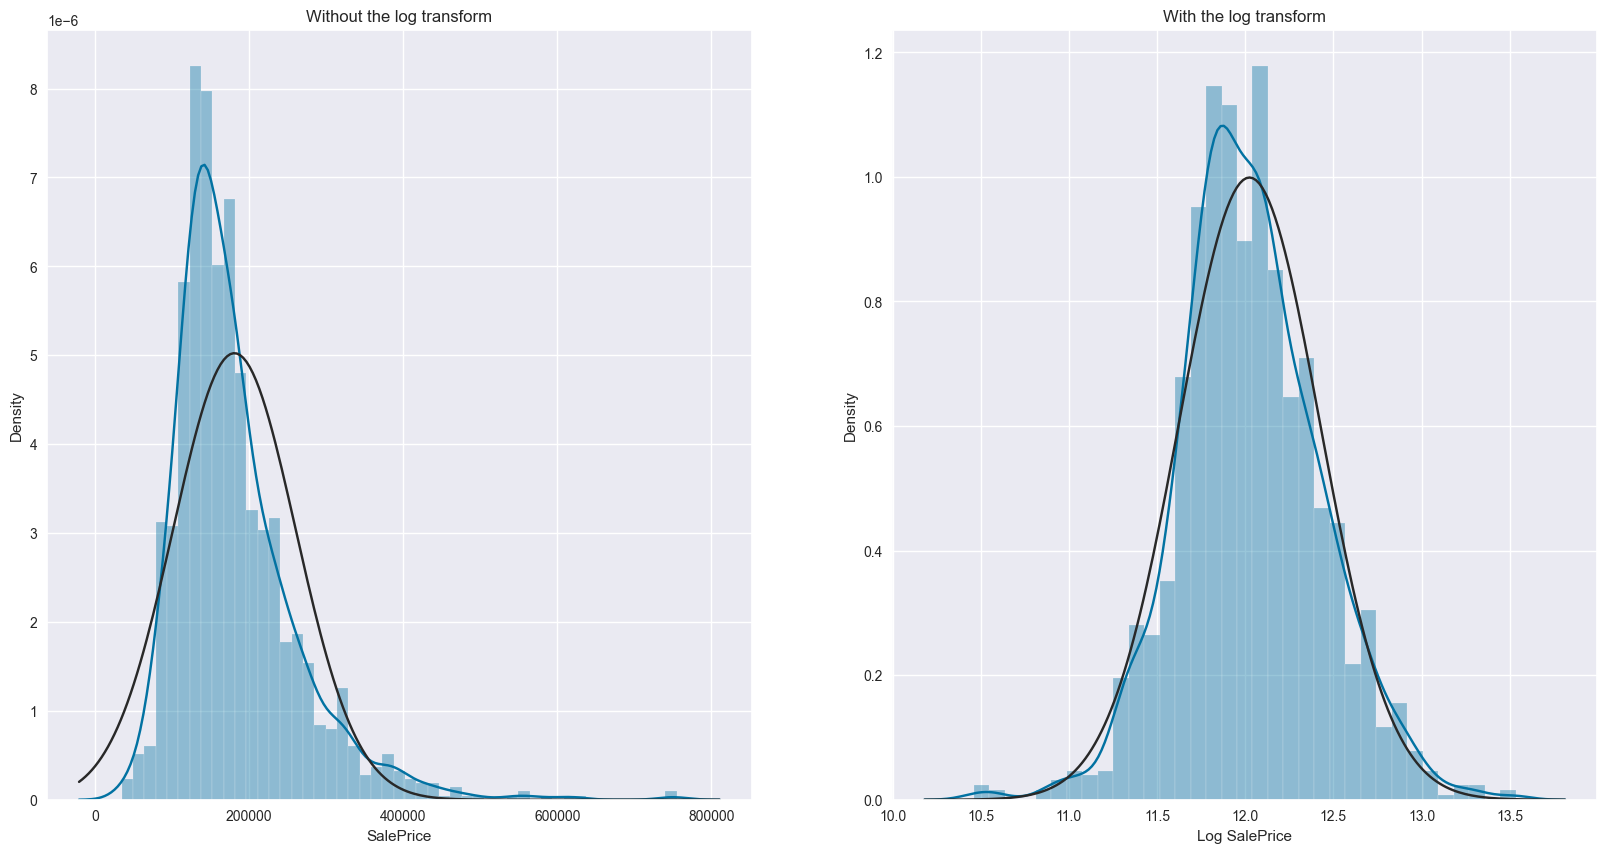

In [55]:
plt.figure(figsize = (20, 10))
plt.subplot(1,2,1)
sns.distplot(target, kde = True, fit = scipy.stats.norm)
plt.title('Without the log transform')

plt.subplot(1,2,2)
sns.distplot(np.log(target), kde = True, fit = scipy.stats.norm)
plt.xlabel('Log SalePrice')
plt.title('With the log transform')

plt.show()

In [56]:
log_target = np.log(target)

In [57]:
log_target

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

### Spliting the data back

In [58]:
train_final = data8.loc[:train0.index.max(), :].copy()

In [59]:
test_final = data8.loc[train0.index.max() + 1:, :].reset_index(drop = True).copy()

In [60]:
test_final

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0        0.553718  0.583084    -0.794739     0.418047  -0.331350   
1        0.604858  1.327437    -0.024027     0.418047  -0.430663   
2        0.246875  1.204457    -0.794739    -0.512044   0.848712   
3        0.451437  0.120432    -0.024027     0.418047   0.881187   
4       -1.338477 -1.279064     1.517398    -0.512044   0.686092   
...           ...       ...          ...          ...        ...   
1454    -2.463565 -2.142739    -1.565452     1.348138  -0.034317   
1455    -2.463565 -2.154558    -1.565452    -0.512044  -0.034317   
1456     1.934508  2.136770    -0.794739     1.348138  -0.364437   
1457    -0.366809  0.250729    -0.794739    -0.512044   0.686092   
1458     0.246875  0.021654     0.746685    -0.512044   0.718648   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0        -1.114439   -0.806614    0.650343    2.382083  -0.010415   
1        -1.258547    1.000767    0.878557   -0.364582   0.208172   
2         0.662894   -0.806614    0.826678   -0.364582  -0.373135   
3         0.662894    0.366314    0.734922   -0.364582   0.087247   
4         0.374678   -0.806614    0.456948   -0.364582   0.700915   
...            ...         ...         ...         ...        ...   
1454     -0.682115   -0.806614   -1.419600   -0.364582   0.367067   
1455     -0.682115   -0.806614    0.442625   -0.364582   0.035193   
1456      0.566822   -0.806614    0.973456   -0.364582  -3.021388   
1457      0.374678   -0.806614    0.540106   -0.364582   0.394832   
1458      0.470750    0.947805    0.812355   -0.364582  -0.077951   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0       -0.393242 -0.721655 -0.863932           0.0  -1.300587      -0.84322   
1        0.746988  0.539140 -0.863932           0.0  -0.341221      -0.84322   
2       -0.275903 -0.628479  1.142322           0.0   0.323467      -0.84322   
3       -0.281004 -0.634302  1.132125           0.0   0.268076      -0.84322   
4        0.621997  0.396464 -0.863932           0.0  -0.449787      -0.84322   
...           ...       ...       ...           ...        ...           ...   
1454    -1.250327 -1.740774  1.065951           0.0  -0.866324      -0.84322   
1455    -1.250327 -1.740774  1.065951           0.0  -0.866324      -0.84322   
1456     0.479149  0.233405 -0.863932           0.0  -0.573862       1.18660   
1457    -0.316716 -0.506184 -0.863932           0.0  -1.136631      -0.84322   
1458    -0.102445 -0.430478  1.252159           0.0   1.145464      -0.84322   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0        -0.252538 -1.073143 -0.769157     -1.115043      0.032075   
1        -0.252538 -1.073143  1.300124      0.231589      0.032075   
2        -0.252538  0.901954  1.300124      0.231589      0.032075   
3        -0.252538  0.901954  1.300124      0.231589      0.032075   
4        -0.252538  0.901954 -0.769157     -1.115043      0.032075   
...            ...       ...       ...           ...           ...   
1454     -0.252538 -1.073143  1.300124      0.231589      0.032075   
1455     -0.252538 -1.073143  1.300124      0.231589      0.032075   
1456     -0.252538 -1.073143 -0.769157      1.578221      0.032075   
1457      3.959798 -1.073143 -0.769157      0.231589      0.032075   
1458     -0.252538  0.901954  1.300124      0.231589      0.032075   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0        -0.989015   -0.989960    -0.658575   -1.018498    1.294216   
1        -0.272654   -0.989960    -0.779930   -1.018498   -0.768602   
2        -0.272654    0.778381     0.783375    0.320689    0.070343   
3         0.443707    0.778381     0.823058    0.320689    0.011123   
4        -0.989015   -0.989960     0.584665    0.320689    0.188782   
...            ...         ...          ...         ...         ...   
1454     -0.989015   -0.989960    -0.142873   -2.357686   -2.

# Model Selection

In [61]:
_  = setup(data = pd.concat([train_final, log_target],axis=1), target = 'SalePrice')

In [62]:
compare_models()

## Baseline Model

In [63]:
baseline_model = CatBoostRegressor(verbose = 0)

In [64]:
baseline_model.fit(train_final, log_target)

# Hyperparameter Optimization

# Bagging Ensemble

In [82]:
catboost_params = {
    'depth': 6,
    'iterations': 928,
    'learning_rate': 0.023297344060322127,
    'l2_leaf_reg': 0.0036705183892567807,
    'bagging_temperature': 0.9690066831823947,
    'border_count': 33,
    'min_data_in_leaf': 35
}

br_params = {
    'n_iter': 153,
    'tol': 0.055335245597528684,
    'alpha_1': 2.2077440794275692e-07,
    'alpha_2': 9.978279039949514,
    'lambda_1': 0.05215501357864934,
    'lambda_2': 2.2728644647978058e-08
}

lightgbm_params = {
    'learning_rate': 0.07216901146306012,
    'n_estimators': 429,
    'max_depth': 3,
    'num_leaves': 67
}

ridge_params = {
    'alpha': 469.1346581698973
}

omp_params = {
    'n_nonzero_coefs': 7, 
    'tol': 4.046752910748172  
}

In [83]:
models = {'catboost' : CatBoostRegressor(**catboost_params, verbose = 0),
         'br' : BayesianRidge(**br_params),
         'lightgbm' : LGBMRegressor(**lightgbm_params, verbose = -1, force_col_wise=True),
         'ridge' : Ridge(**ridge_params),
         'omp' : OrthogonalMatchingPursuit(**omp_params)}

In [84]:
for name, model in models.items():
    model.fit(train_final, log_target)
    print(name + ' trained.')

catboost trained.
br trained.
lightgbm trained.
ridge trained.
omp trained.


## Evaluataion

In [85]:
results = {}
kf = KFold(n_splits = 10)
for name, model in models.items():
    result = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring = 'neg_mean_squared_error', cv = kf)))
    results[name] = result

In [86]:
results

{'catboost': array([1.11385335, 1.0957973 , 1.11028898, 1.14811069, 1.15881245,
        1.10983089, 1.12387127, 1.10236996, 1.1211125 , 1.13484324]),
 'br': array([1.12242613, 1.1044891 , 1.12498523, 1.16061753, 1.16364211,
        1.12162692, 1.12788884, 1.1061137 , 1.14694613, 1.13420295]),
 'lightgbm': array([1.13087641, 1.10147187, 1.1116351 , 1.16216278, 1.17274661,
        1.10870696, 1.12221991, 1.11499342, 1.13215767, 1.1454279 ]),
 'ridge': array([1.12225551, 1.10429189, 1.12424832, 1.16119657, 1.1635958 ,
        1.11991056, 1.12766453, 1.10619029, 1.14714243, 1.13366671]),
 'omp': array([1.13962183, 1.11523371, 1.13043282, 1.16228144, 1.17944016,
        1.13683924, 1.13507007, 1.11044437, 1.15799597, 1.13967491])}

In [87]:
for name, result in results.items():
    print("----------\n" + name)
    print(np.mean(result))
    print(np.std(result))

----------
catboost
1.1218890637309908
0.01905141080628232
----------
br
1.131293863138589
0.01932810890132261
----------
lightgbm
1.1302398629134056
0.022349116594445387
----------
ridge
1.1310162624146451
0.019562727509362988
----------
omp
1.1407034520021289
0.0199596443512161


In [88]:
r2_scores = {}

# Calculate R-squared scores for each model
for name, model in models.items():
    target_pred = np.exp(models[name].predict(train_final))
    r2 = r2_score(np.exp(log_target), target_pred)
    r2_scores[name] = r2
    print(f"R-squared score for {name}: {r2}")

R-squared score for catboost: 0.9894811509554167
R-squared score for br: 0.9232897580279597
R-squared score for lightgbm: 0.972119488535859
R-squared score for ridge: 0.9191869947587739
R-squared score for omp: 0.9336761048683859


# Combine Predictions

In [89]:
final_predictions = (
    0.4 * np.exp(models['catboost'].predict(test_final)) +
    0.2 * np.exp(models['br'].predict(test_final)) +
    0.2 * np.exp(models['lightgbm'].predict(test_final)) +
    0.1 * np.exp(models['ridge'].predict(test_final)) +
    0.1 * np.exp(models['omp'].predict(test_final))
)

In [90]:
final_predictions

array([124690.49364039, 157709.09026767, 183166.22270018, ...,
       160971.19894551, 116576.40608735, 215471.41994599])

In [91]:
submission = pd.concat([test_id, pd.Series(final_predictions, name='SalePrice')], axis=1)
submission

Id      SalePrice
0     1461  124690.493640
1     1462  157709.090268
2     1463  183166.222700
3     1464  194058.162560
4     1465  189956.917948
...    ...            ...
1454  2915   84367.387059
1455  2916   81391.171728
1456  2917  160971.198946
1457  2918  116576.406087
1458  2919  215471.419946

[1459 rows x 2 columns]

In [92]:
submission.to_csv('submission.csv', index=False, header=True)